Importing pandas and numpy:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Reading .csv and setting start options:

In [33]:
pd.set_option('display.max_rows', 10)
df = pd.read_csv('layoffs.fyi_20240208_003251.csv', on_bad_lines='warn', sep=';')
df['id'] = df['id'].fillna(0).astype(int)
df = df.set_index('id')
df

Skipping line 997: expected 13 fields, saw 15



,Company,Location HQ,# Laid Off,Date,%,Industry,Source,List of emploees laid,Stage,$ Raised mm,Country,Date added
id,,,,,,,,,,,,
0,Grammarly,SF Bay Area,230,2024-02-07,no-data,Consumer,https://elbuz.com/en/grammarly-skorochue-230-c...,no-data,Unknown,$400,United States,2024-02-07
1,Fireblocks,New York City,20,2024-02-07,3%,Crypto,https://www.calcalistech.com/ctechnews/article...,no-data,Series E,"$1,000",United States,2024-02-07
2,Workfellow,EspooNon-U.S.,no-data,2024-02-07,100%,HR,https://tech.eu/2024/02/07/finnish-hrtech-star...,no-data,Seed,$3,Finland,2024-02-07
3,DocuSign,SF Bay Area,440,2024-02-06,6%,Sales,https://www.cnbc.com/2024/02/06/docusign-to-la...,no-data,Post-IPO,$536,United States,2024-02-06
4,Amazon,Seattle,400,2024-02-06,no-data,Retail,https://www.businessinsider.com/amazon-one-med...,no-data,Post-IPO,$108,United States,2024-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...
3424,Service,Los Angeles,no-data,2020-03-16,100%,Travel,https://techcrunch.com/2020/03/16/travel-savin...,no-data,Seed,$5,United States,2020-08-31
3425,HopSkipDrive,Los Angeles,8,2020-03-13,10%,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,no-data,Unknown,$45,United States,2020-04-02
3426,Panda Squad,SF Bay Area,6,2020-03-13,75%,Consumer,https://twitter.com/danielsinger/status/123854...,no-data,Seed,$1,United States,2020-04-16


<hr>

In [43]:
df['Date'] = pd.to_datetime(df['Date'])

Recording period: 

In [48]:
latest_date = df['Date'].max()
earliest_date = df['Date'].min()
print("Latest date: " + str(latest_date))
print("Earliest_date: " + str(earliest_date))

Latest date: 2024-02-07 00:00:00
Earliest_date: 2020-03-12 00:00:00


Getting rid of no-data lines and translating str to numeric: 

In [34]:
df['# Laid Off'] = pd.to_numeric(df['# Laid Off'], errors='coerce')
df.dropna(subset=['# Laid Off'], inplace=True)

df['%'] = pd.to_numeric(df['%'].str.rstrip('%'), errors='coerce')
df.dropna(subset=['%'], inplace=True)

Plotting "Laid off" amount + taking not into account companies with no-data: 

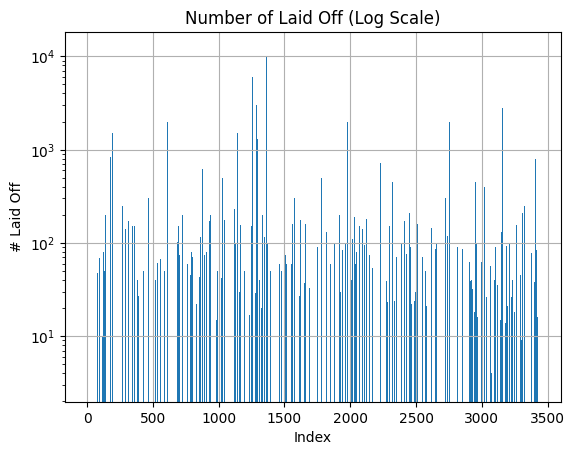

In [35]:
plt.bar(df.index, df['# Laid Off'])
plt.yscale('log')
plt.xlabel('Index')
plt.ylabel('# Laid Off')
plt.title('Number of Laid Off (Log Scale)')
plt.grid(True)
plt.show()

Plotting % of laid offs:

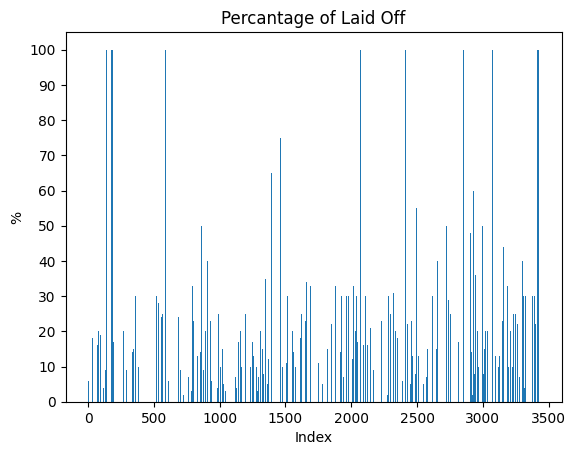

In [36]:
plt.bar(df.index.values, df['%'])
plt.yticks(range(0, 101, 10))
plt.xlabel('Index')
plt.ylabel('%')
plt.title('Percantage of Laid Off')
plt.show()

Note: There are companies whose layoff rate is 100% - that's not a mistake.

<hr>

Arrays:

In [39]:
array_pr = df['%'].to_numpy()
print(array_pr)

[ 3.  6. 10. ... 10. 75. 40.]


In [19]:
array_nm = df['# Laid Off'].to_numpy()
print(array_nm)

[230.  20. 440. ...   6.  20.  75.]


<hr>

Mean, standart deviation, variance of Laid off numbers:

In [22]:
mean_nm = np.mean(array_nm)
std_nm = np.std(array_nm)
var_nm = np.var(array_nm)
print("Mean of Laid off numbers: {} \nVariance of Laid odd numbers: {} \nStandart Deviation of Laid off numbers: {}".format(mean_nm, var_nm, std_nm))

Mean of Laid off numbers: 247.83895297249333 
Variance of Laid odd numbers: 604845.9070718407 
Standart Deviation of Laid off numbers: 777.7183983112658


The following conclusion is based on data taken from layoffs.fyi_20240208_003251.csv dataset:<br>
    
    On average - 248 people being laid off
    
    The variance is 604845.91 - this indicates that the data is significantly scattered with respect to its mean value.</li>

    The standard deviation is about 777.72 - this indicates that the values deviate from the mean value by a significant amount, which confirms that there is a significant scatter in the data.

From this data, it can be concluded that the number of laid off employees during this time period has a significant variation which can be due to various factors - economic sutuation/condition, crisis, company scale... 
    

 <hr>

Mean, standart deviation, variance of laid off percentage:

In [40]:
mean_pr = np.mean(array_pr)
std_pr = np.std(array_pr)
var_pr = np.var(array_pr)
print("Mean of Laid off %: {} \nVariance of Laid odd %: {} \nStandart Deviation of Laid off %: {}".format(mean_pr, var_pr, std_pr))

Mean of Laid off %: 22.15181932245922 
Variance of Laid odd %: 445.10744022833427 
Standart Deviation of Laid off %: 21.09756953367696


The following conclusion is based on data taken from layoffs.fyi_20240208_003251.csv dataset:<br>

    The average percentage of Laid off employees is about 22.15%.

    The variance of Laid off rate is 445.11 - this again indicates that the data are significantly scattered relative to their mean quit rate.
    
    The standard deviation of the percentage is about 21.10% - this too indicates in comparison to numers that the values of the percentage of dismissed employees deviate from the mean value by a significant amount.

Comparing this data with previous data on the number of terminated employees, we can conclude that the average laid off rate is about 22%, with the variance in percentages being slightly smaller than in absolute values, which may be due to the fact that percentages are more robust to large outliers in the data. 

Nevertheless, both sets of data show significant variation in the values and approximatly percentage of laid off(22 with a big number of deviation - 21,10%) - this indicates that there is considerable variability and uncertainty in the data, reasons for which should be studied.

### Recoding period - 2020-03-12 -- 2024-02-07